In [3]:
import random
from scipy.stats import poisson

def gen_starttime(totalapp):
    #generate random values from Poisson distribution with mean=mu and sample size=size
    starttimelist = poisson.rvs(mu=10, size=totalapp)
#     print(starttimelist)
    return starttimelist
    
    
def gen_nNodes(totalapp):
    nNodeslist = [random.randint(1, 4) for p in range(0, totalapp)]
    print(nNodeslist)
    return nNodeslist
    
def gen_benchmarkseq(totalapp,benchmarks,benchmarkdistribution,benchmarkcharacteristic):
    shuffledbenchmarks=[]
    for i, benchmark in enumerate(benchmarks):
        for i in range(benchmarkdistribution[i]):
            shuffledbenchmarks.append(f"{benchmark}-{i}")
#     print(shuffledbenchmarks)
    random.shuffle(shuffledbenchmarks)
    print(shuffledbenchmarks)
    
    characteristiclist = []
    for ben in shuffledbenchmarks:
        characteristiclist.append(benchmarkcharacteristic.get(ben.split("-")[0]))
    print(characteristiclist)
    return shuffledbenchmarks,characteristiclist

In [4]:
import csv
import subprocess

header = ['index','benchmark','times','nTasks','nNodes','starttime','characteristic']

def writeCSVExp2Parameters(filename, totalapp, shuffledbenchmarks, nTasks, nNodeslist, startimelist, characteristiclist):

    with open(f"{filename}.csv", "w", encoding="UTF8") as f:
        writer = csv.writer(f)
        writer.writerow(header)
        for i in range(totalapp):
#             print(shuffledbenchmarks[i])
            splitstr = shuffledbenchmarks[i].split("-")
            writer.writerow([i, 
                             splitstr[0], splitstr[1], 
                             nTasks, nNodeslist[i],
                             starttimelist[i],
                             characteristiclist[i]
                            ])
        

In [5]:
#fixed
nTasks = 16
#parameters
benchmarks = ['hpccfft','hpccdgemm','hpccrandomring','hpccrandomaccess','hpccptrans','hpccstream']
totalapp = 60
benchmarkdistribution = [10,10,10,10,10,10]
benchmarkcharacteristic = {'hpccfft':'network',
                           'hpccdgemm':'cpu',
                           'hpccrandomring':'network',
                           'hpccrandomaccess':'network',
                           'hpccptrans':'network',
                           'hpccstream':'memory'}

for times in range(10):
    nNodeslist = gen_nNodes(totalapp)
    shuffledbenchmarks, characteristiclist = gen_benchmarkseq(totalapp, benchmarks, benchmarkdistribution, benchmarkcharacteristic)
    starttimelist = gen_starttime(totalapp)
    writeCSVExp2Parameters(f"exp2parametersS1-{times}", 
                           totalapp,
                           shuffledbenchmarks,
                           nTasks, nNodeslist, starttimelist, characteristiclist)

[1, 2, 1, 3, 4, 4, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 3, 1, 1, 3, 4, 2, 2, 3, 3, 2, 3, 4, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 4, 2, 1, 4, 1, 3, 4]
['hpccrandomaccess-3', 'hpccdgemm-3', 'hpccptrans-2', 'hpccdgemm-6', 'hpccptrans-9', 'hpccfft-7', 'hpccrandomaccess-6', 'hpccrandomring-4', 'hpccdgemm-9', 'hpccstream-0', 'hpccstream-7', 'hpccptrans-0', 'hpccptrans-4', 'hpccrandomaccess-2', 'hpccstream-3', 'hpccdgemm-2', 'hpccptrans-7', 'hpccstream-9', 'hpccrandomaccess-5', 'hpccrandomaccess-4', 'hpccrandomring-2', 'hpccfft-6', 'hpccrandomring-9', 'hpccrandomring-3', 'hpccdgemm-8', 'hpccstream-6', 'hpccfft-8', 'hpccstream-4', 'hpccstream-5', 'hpccptrans-5', 'hpccrandomaccess-9', 'hpccstream-2', 'hpccfft-3', 'hpccdgemm-7', 'hpccrandomaccess-8', 'hpccstream-1', 'hpccrandomring-5', 'hpccrandomaccess-7', 'hpccfft-4', 'hpccdgemm-4', 'hpccdgemm-5', 'hpccrandomring-8', 'hpccrandomring-6', 'hpccrandomring-1', 'hpccstream-8', 'hpccdgemm-0', 'hpccrandomring-7', 'hpccp

[10  8  5 10  7  9  7  5 12 15 14 12  7 10  8  9  8  9 11 10 10  8 12  9
  5  6 11 14 11 11  8 11 12 12  5  9 11 11 10  8  7 12 19 10 12 12 11  7
 11 11 11  7  6  3 11  9  8  6 13  9]


/gpfs/bsc_home/xpliu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


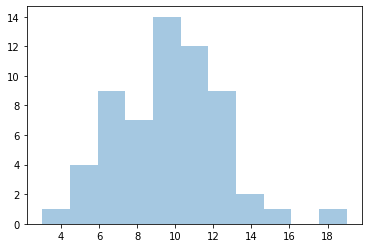

In [4]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
# random.poisson(lam=2, size=1000)
time = gen_starttime(60)
print(time)
sns.distplot(time, kde=False)

plt.show()